# EDA (Exploratory Data Analysis)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

In [2]:
# data_df1=pd.read_csv("Missing_values_dropped.csv")
Crop_df=pd.read_csv("Crop_data_filtered.csv")
# Crop_df2=pd.read_csv("Crop_data_filtered_outliers_removed.csv")
# Crop_df3=pd.read_csv("Crop_data_missing_values_dropped_outliers_removed.csv")
# min_ten_years_crops=pd.read_csv("min_ten_years_crops.csv")

In [3]:
Crop_df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zone,Crop_Category,Production/Area
0,Andaman_and_Nicobar_Islands,NICOBARS,2000,Kharif,Arecanut,"1,254.00","2,000.00",ut_india,Others,1.59
1,Andaman_and_Nicobar_Islands,NICOBARS,2000,Kharif,Other_Kharif_pulses,2.00,1.00,ut_india,Others,0.50
2,Andaman_and_Nicobar_Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,ut_india,Cereals,3.15
3,Andaman_and_Nicobar_Islands,NICOBARS,2000,Whole_Year,Banana,176.00,641.00,ut_india,Fruits,3.64
4,Andaman_and_Nicobar_Islands,NICOBARS,2000,Whole_Year,Cashewnut,720.00,165.00,ut_india,Nuts,0.23


<Axes: xlabel='Area', ylabel='Production'>

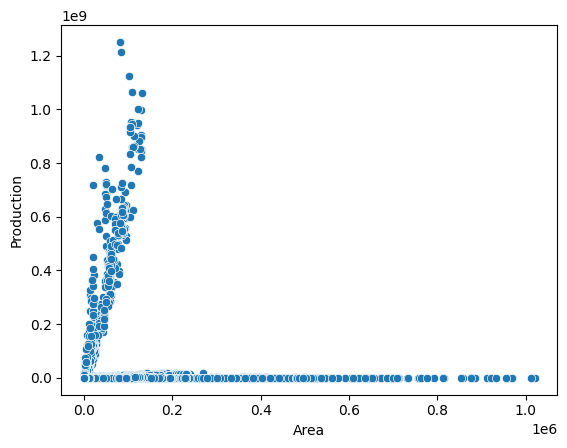

In [4]:
sns.scatterplot(data=Crop_df,x="Area",y="Production")

<Axes: xlabel='Production', ylabel='Season'>

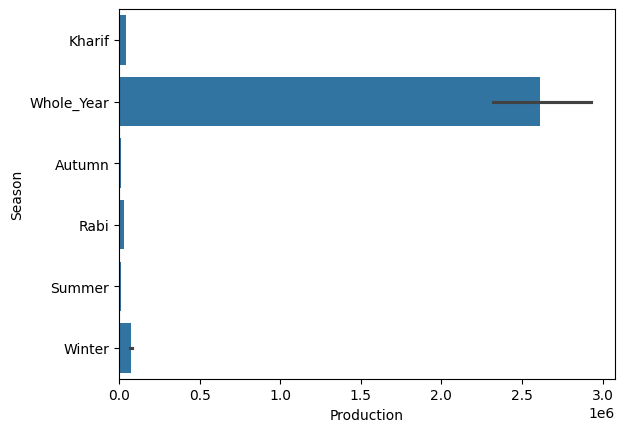

In [5]:
sns.barplot(data=Crop_df,y="Season",x="Production")

<Axes: >

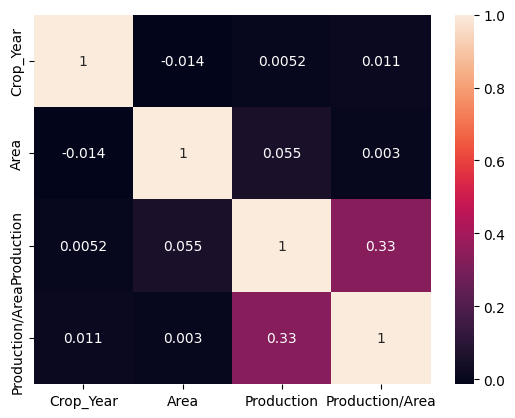

In [6]:
numerical_cols = Crop_df.select_dtypes(include=[np.number]).columns
sns.heatmap(Crop_df[numerical_cols].corr(),annot=True)


### Observations:
- The highest production was recorded for the entire year.
- There is no correlation observed between any of the features.

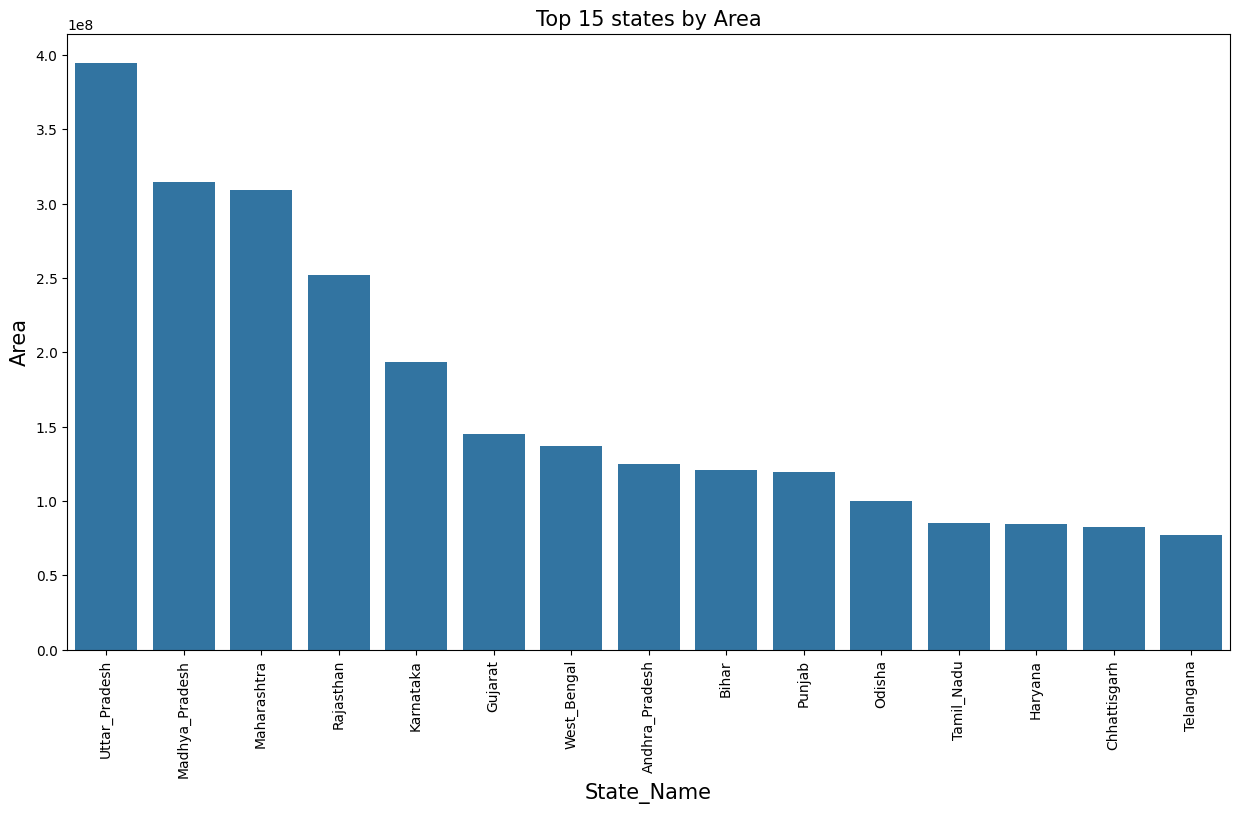

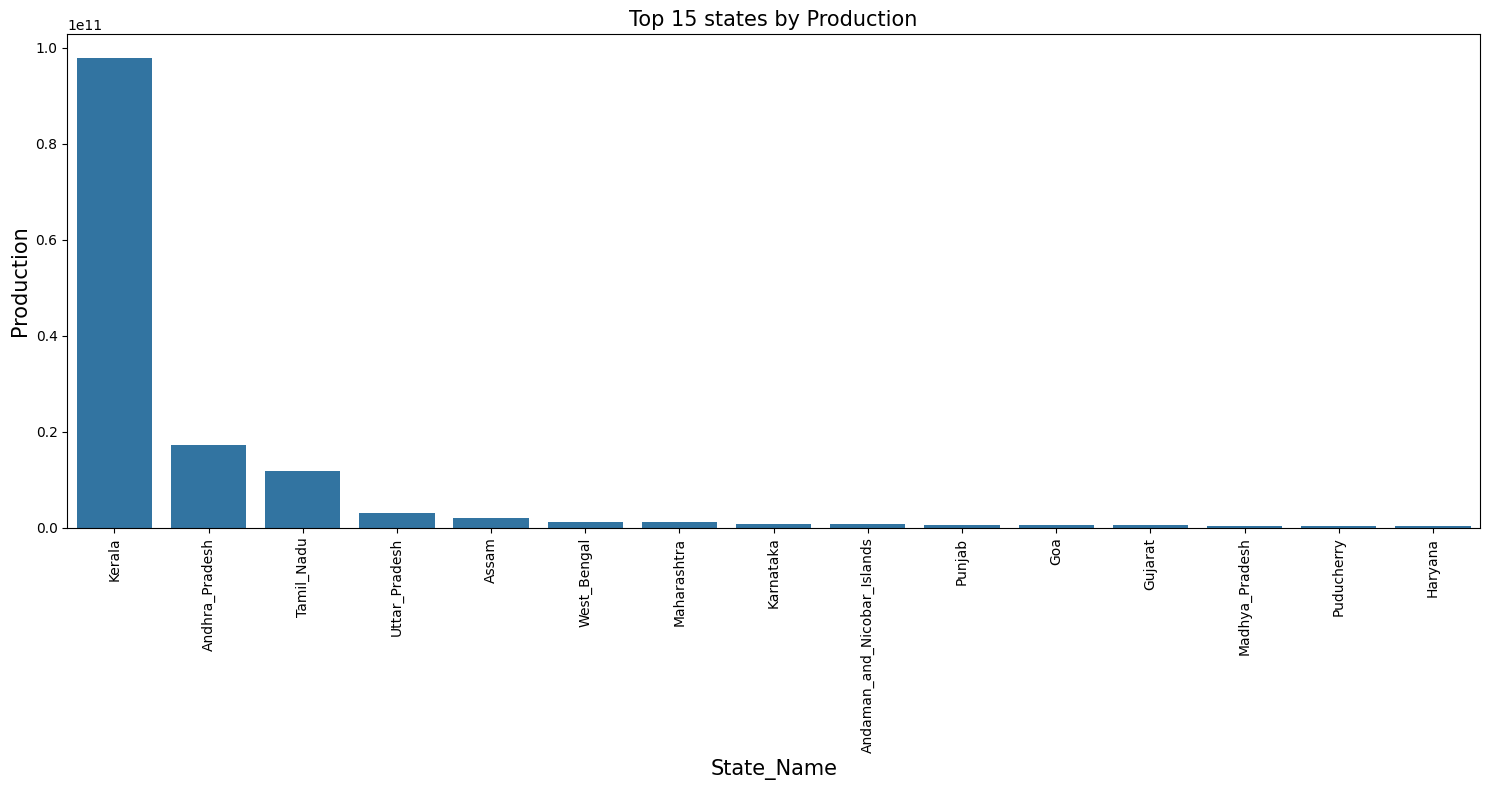

In [7]:
State_wise = Crop_df.groupby('State_Name').sum().drop('Crop_Year', axis=1).reset_index()

State_wise_area = State_wise.sort_values(by="Area", ascending=False)
State_wise_production = State_wise.sort_values(by="Production", ascending=False)

plt.figure(figsize=(15, 8))

sns.barplot(data=State_wise_area.head(15), x='State_Name', y='Area')
plt.xticks(rotation=90)
plt.title("Top 15 states by Area",fontsize=15)
plt.xlabel("State_Name",fontsize=15)
plt.ylabel("Area",fontsize=15)
plt.show()

plt.figure(figsize=(15, 8))

sns.barplot(data=State_wise_production.head(15), x='State_Name', y='Production')
plt.xticks(rotation=90)
plt.title("Top 15 states by Production",fontsize=15)
plt.xlabel("State_Name",fontsize=15)
plt.ylabel("Production",fontsize=15)
plt.tight_layout()
plt.show()



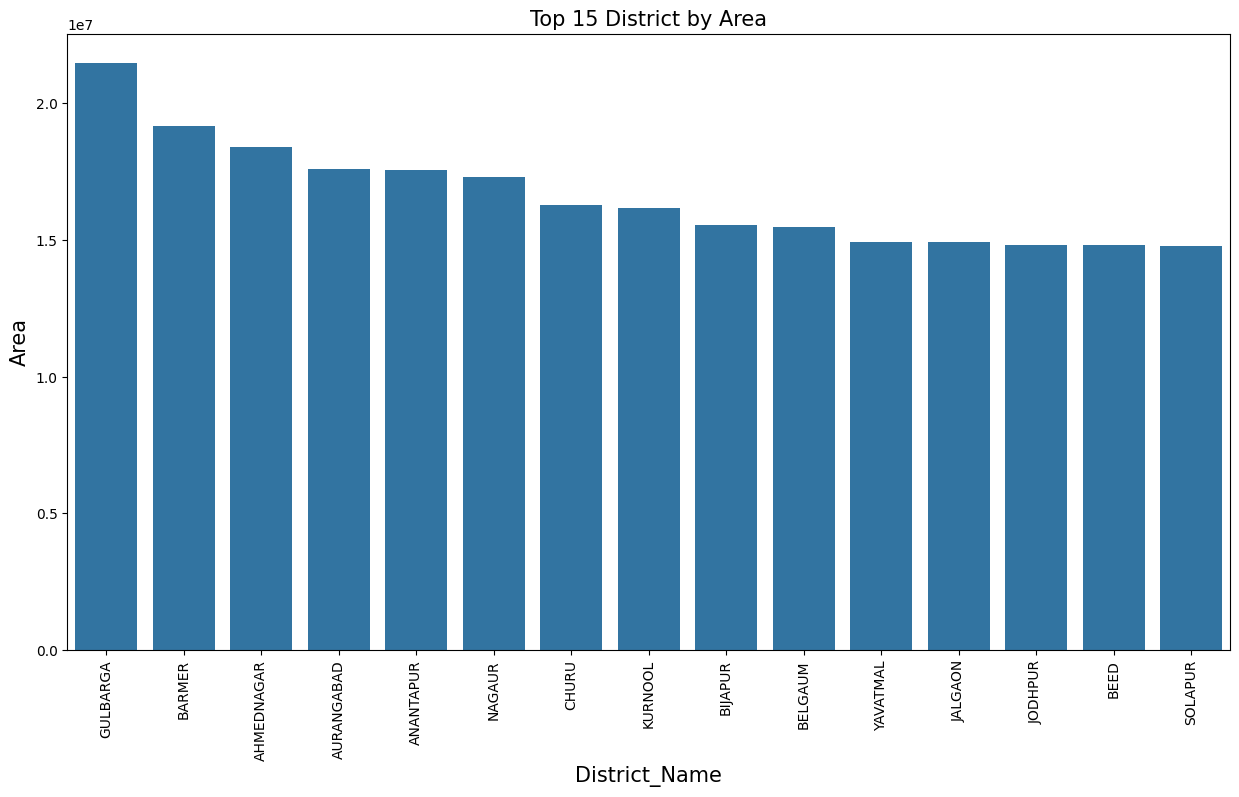

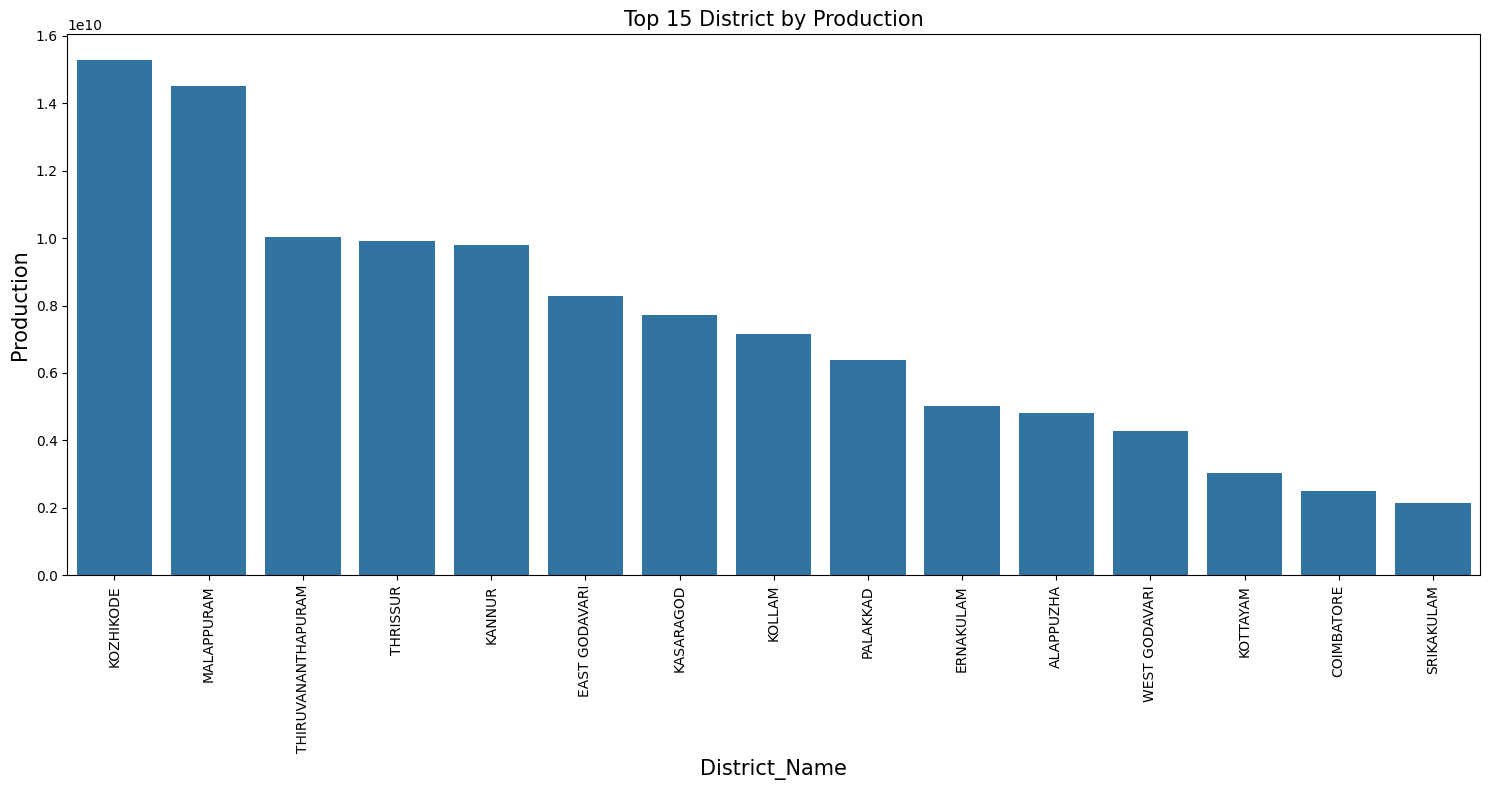

In [8]:
District_wise=Crop_df.groupby('District_Name').sum().drop('Crop_Year',axis=1).reset_index()

District_wise_Area=District_wise.sort_values(by="Area",ascending=False)
District_wise_Production=District_wise.sort_values(by="Production",ascending=False)

plt.figure(figsize=(15, 8))

sns.barplot(data=District_wise_Area.head(15),x="District_Name",y="Area")

plt.xticks(rotation=90)
plt.title("Top 15 District by Area",fontsize=15)
plt.xlabel("District_Name",fontsize=15)
plt.ylabel("Area",fontsize=15)

plt.show()

plt.figure(figsize=(15, 8))

sns.barplot(data=District_wise_Production.head(15),x="District_Name",y="Production")
plt.xticks(rotation=90)
plt.title("Top 15 District by Production",fontsize=15)
plt.xlabel("District_Name",fontsize=15)
plt.ylabel("Production",fontsize=15)
plt.tight_layout()

plt.show()


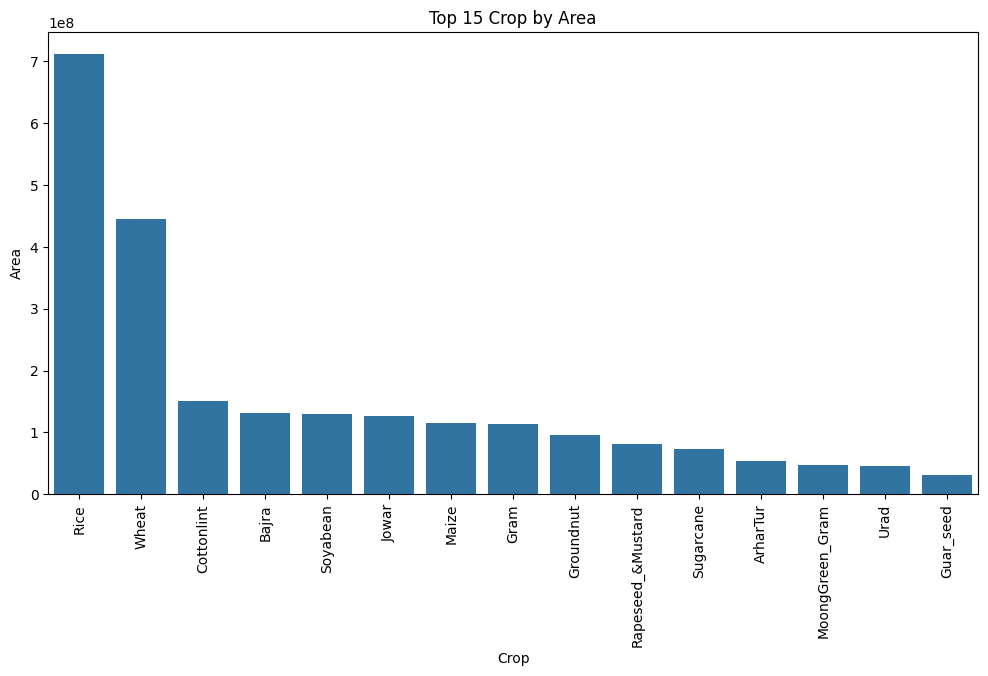

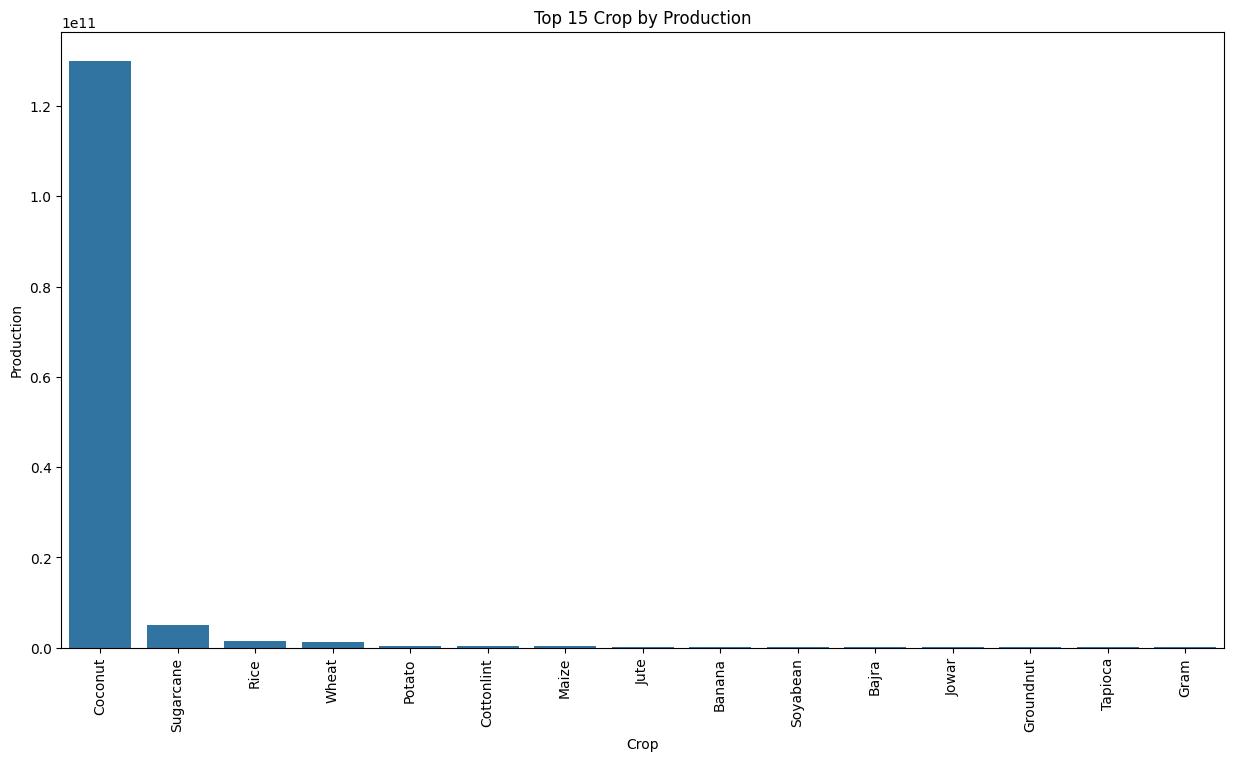

In [9]:
Crop_wise=Crop_df.groupby('Crop').sum().drop('Crop_Year',axis=1).reset_index()

Crop_wise_area=Crop_wise.sort_values(by="Area",ascending=False)
Crop_wise_production=Crop_wise.sort_values(by="Production",ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=Crop_wise_area,x=Crop_wise_area.Crop.head(15),y=Crop_wise_area.Area.head(15))
plt.xticks(rotation=90)
plt.title("Top 15 Crop by Area")
plt.show()

plt.figure(figsize=(15, 8))

sns.barplot(data=Crop_wise_production,x=Crop_wise_production.Crop.head(15),y=Crop_wise_production.Production.head(15))
plt.xticks(rotation=90)
plt.title("Top 15 Crop by Production")
plt.show()

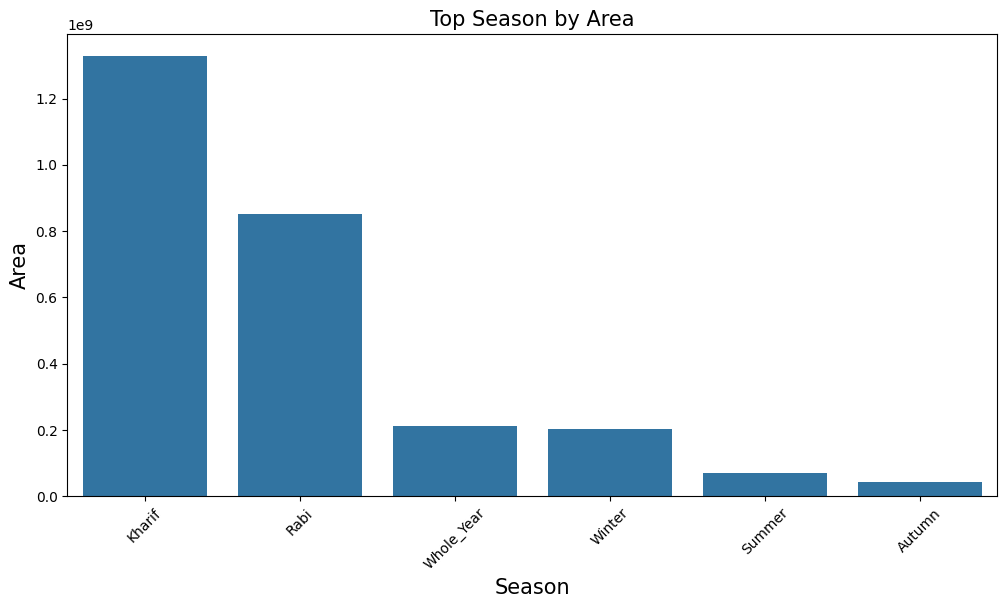

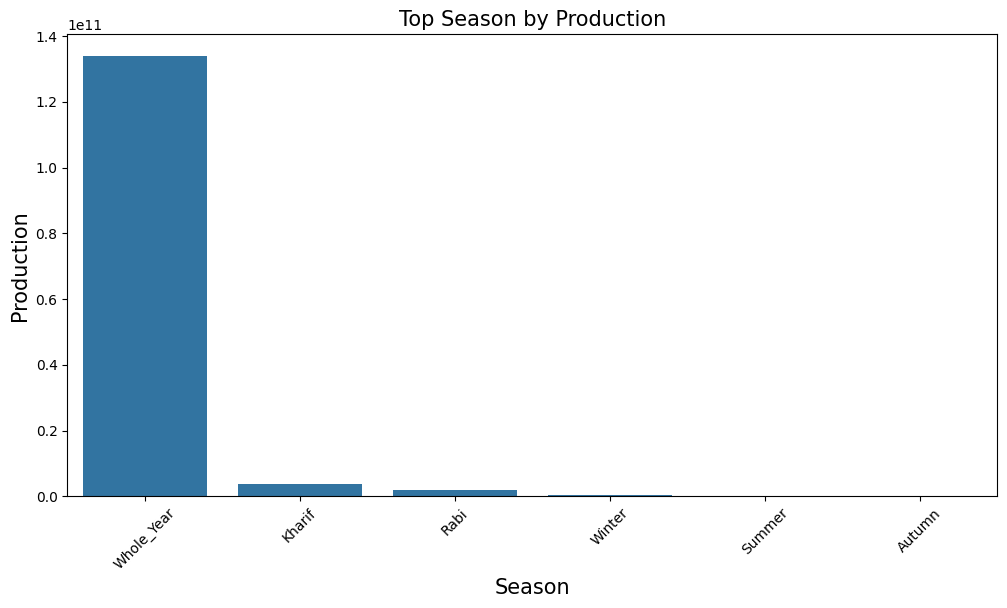

In [10]:
Season_wise=Crop_df.groupby('Season').sum().drop('Crop_Year',axis=1).reset_index()
Season_wise_area=Season_wise.sort_values(by="Area",ascending=False)
Season_wise_production=Season_wise.sort_values(by="Production",ascending=False)


plt.figure(figsize=(12,6))
sns.barplot(data=Season_wise_area.head(15),x="Season",y="Area")
plt.xticks(rotation=45)
plt.title("Top Season by Area",fontsize=15)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Area",fontsize=15)
plt.show()


plt.figure(figsize=(12,6))
sns.barplot(data=Season_wise_production.head(15),x="Season",y="Production")
plt.xticks(rotation=45)
plt.title("Top Season by Production",fontsize=15)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Production",fontsize=15)
plt.show()


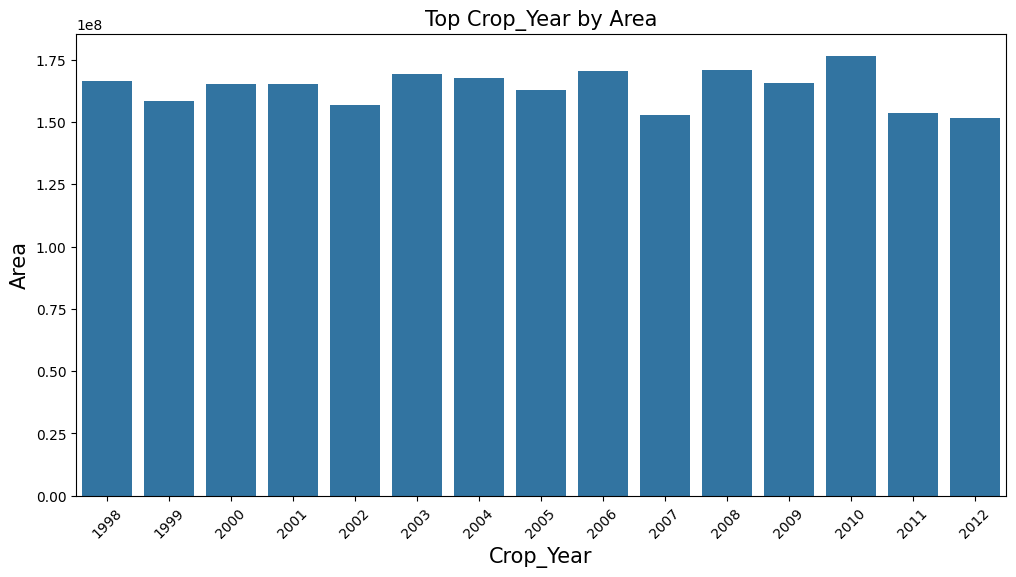

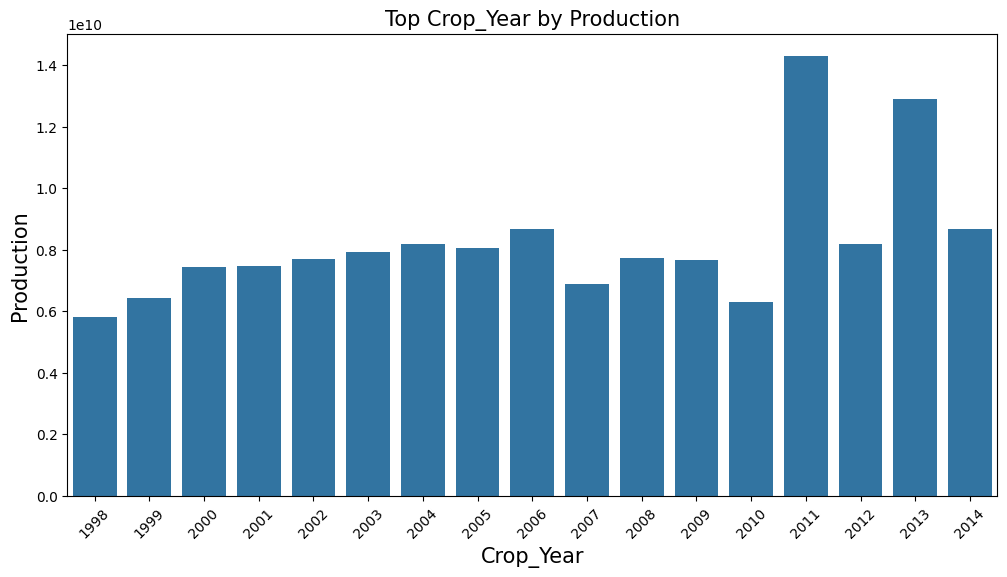

In [11]:
Crop_Year_wise = Crop_df.groupby( 'Crop_Year').sum().reset_index()

Crop_Year_wise_area = Crop_Year_wise.sort_values(by='Area', ascending=False)
Crop_Year_wise_production = Crop_Year_wise.sort_values(by='Production', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=Crop_Year_wise_area.head(15), x='Crop_Year' , y='Area')
plt.title("Top Crop_Year by Area",fontsize=15)
plt.xlabel("Crop_Year",fontsize=15)
plt.ylabel("Area",fontsize=15)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=Crop_Year_wise_production, x='Crop_Year', y='Production')
plt.title("Top Crop_Year by Production",fontsize=15)
plt.xticks(rotation=45)
plt.xlabel("Crop_Year",fontsize=15)
plt.ylabel("Production",fontsize=15)
plt.show()


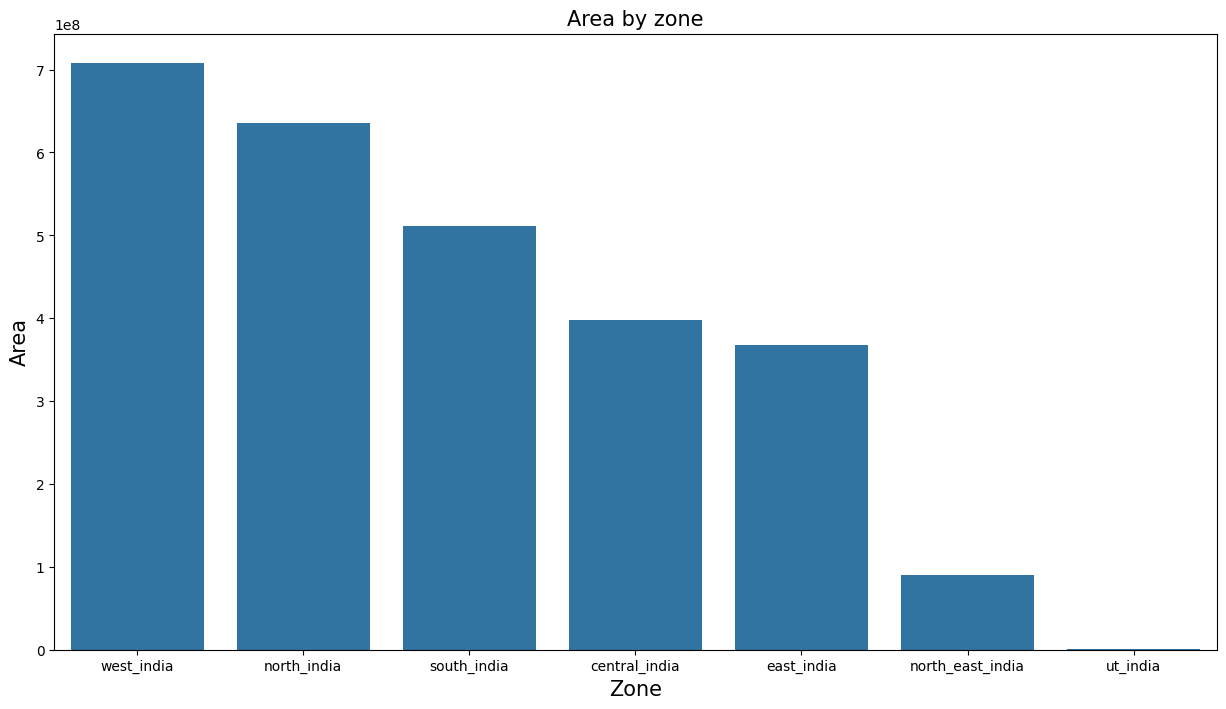

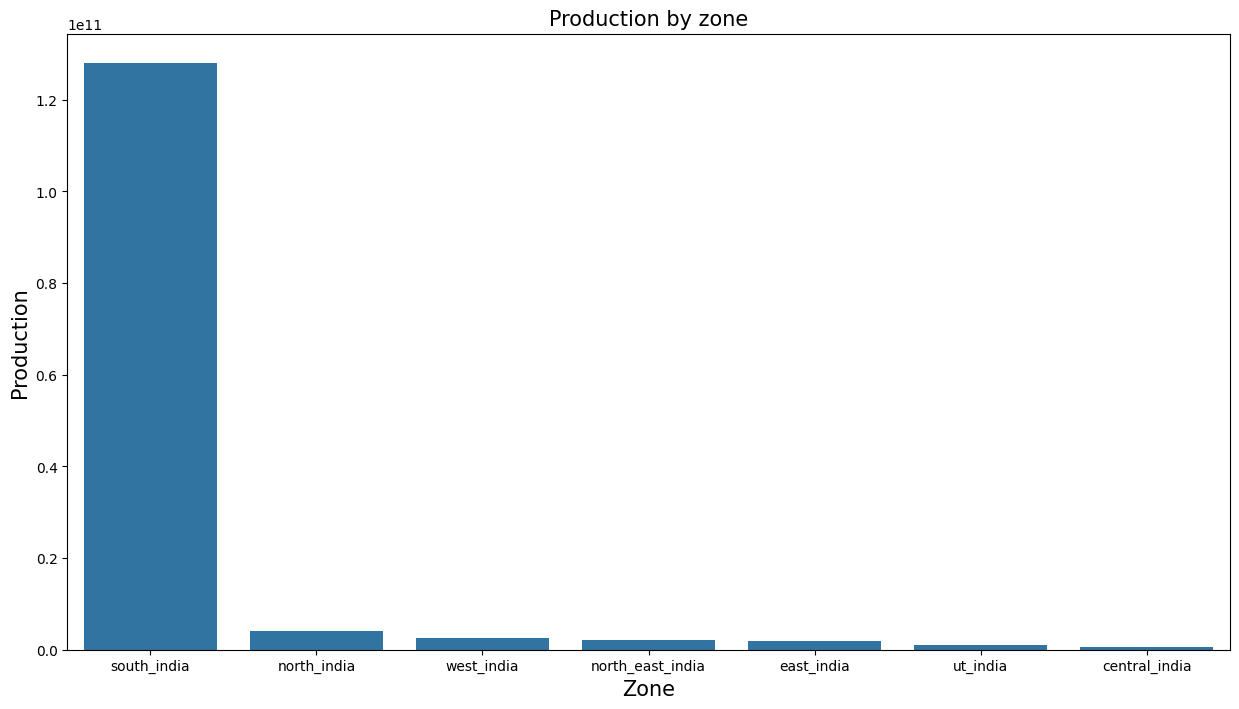

In [12]:
zone_wise=Crop_df.groupby("Zone").sum().reset_index()
zone_wise_Area=zone_wise.sort_values(by="Area",ascending=False)
zone_wise_Production=zone_wise.sort_values(by="Production",ascending=False)


plt.figure(figsize=(15,8))
sns.barplot(data=zone_wise_Area,x="Zone",y="Area")
plt.title("Area by zone",fontsize=15)
plt.xlabel("Zone",fontsize=15)
plt.ylabel("Area",fontsize=15)
plt.show()

plt.figure(figsize=(15,8))
sns.barplot(data=zone_wise_Production,x="Zone",y="Production")
plt.title("Production by zone",fontsize=15)
plt.xlabel("Zone",fontsize=15)
plt.ylabel("Production",fontsize=15)
plt.show()

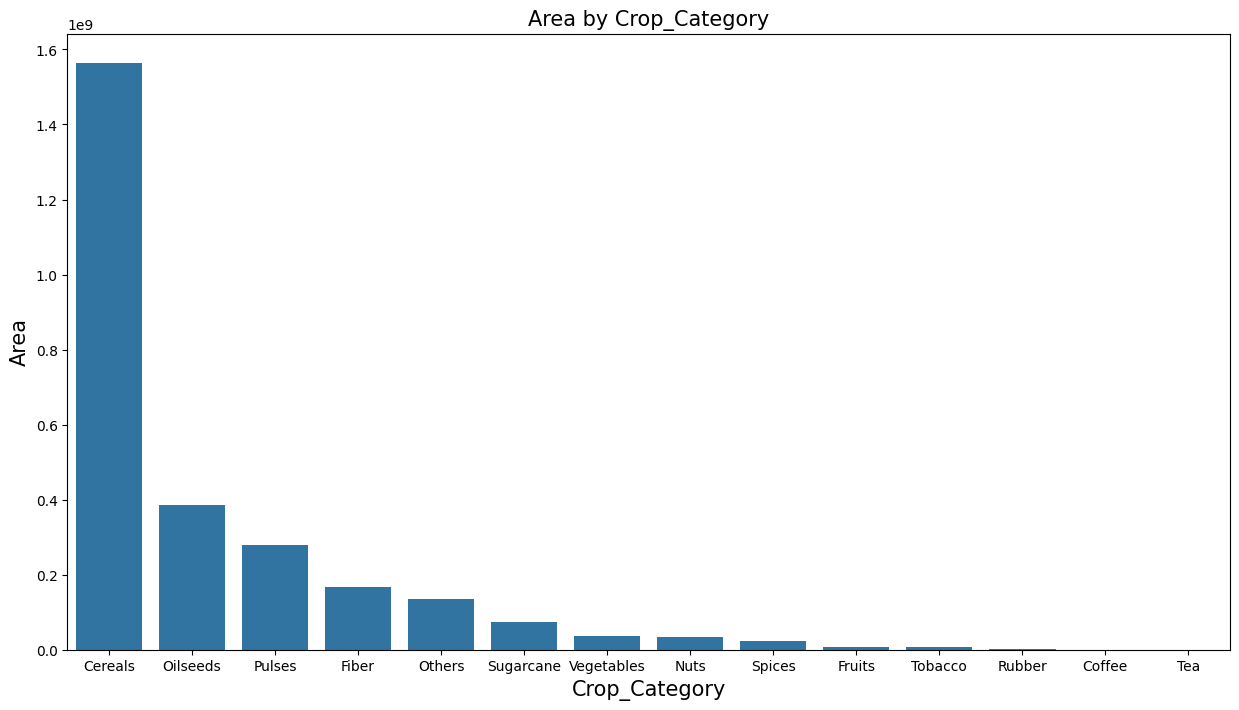

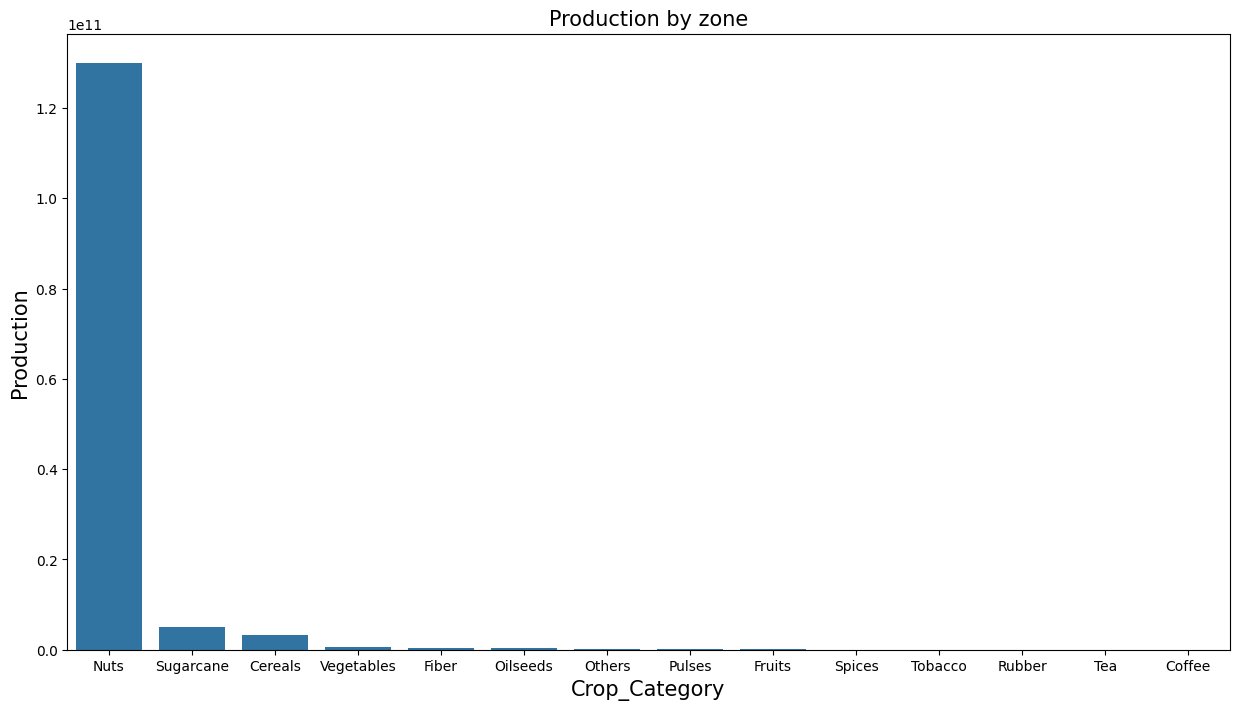

In [14]:
Crop_Category_wise=Crop_df.groupby("Crop_Category").sum().reset_index()
Crop_Category_wise_Area=Crop_Category_wise.sort_values(by="Area",ascending=False)
Crop_Category_wise_Production=Crop_Category_wise.sort_values(by="Production",ascending=False)


plt.figure(figsize=(15,8))
sns.barplot(data=Crop_Category_wise_Area,x="Crop_Category",y="Area")
plt.title("Area by Crop_Category",fontsize=15)
plt.xlabel("Crop_Category",fontsize=15)
plt.ylabel("Area",fontsize=15)
plt.show()

plt.figure(figsize=(15,8))
sns.barplot(data=Crop_Category_wise_Production,x="Crop_Category",y="Production")
plt.title("Production by zone",fontsize=15)
plt.xlabel("Crop_Category",fontsize=15)
plt.ylabel("Production",fontsize=15)
plt.show()

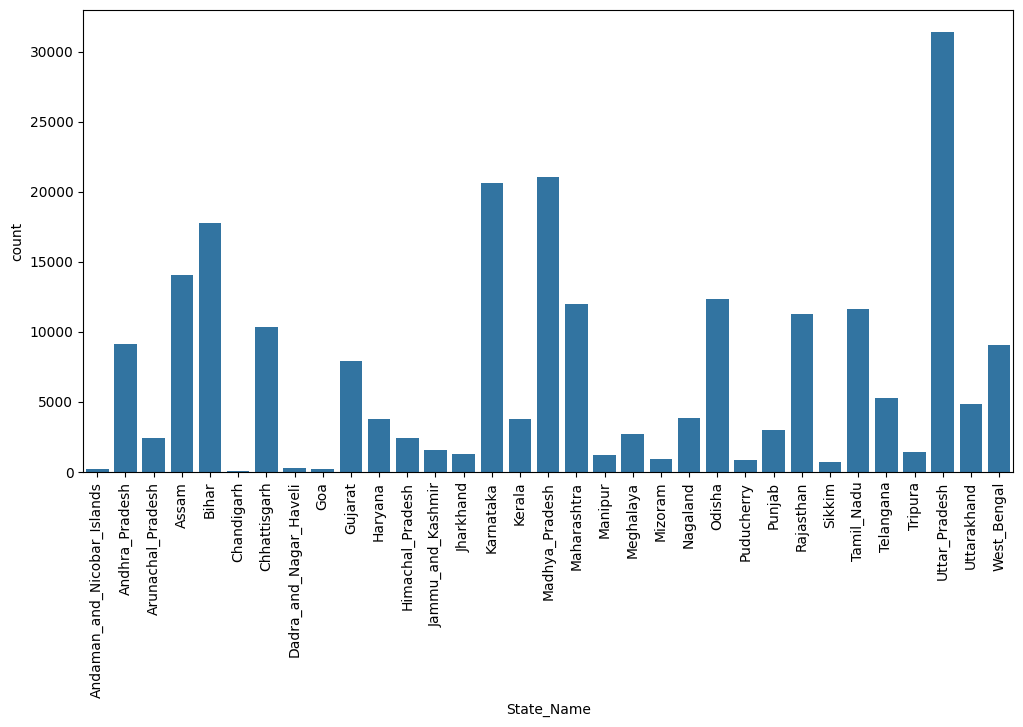

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x=Crop_df["State_Name"],data=Crop_df)
plt.xticks(rotation=90)
plt.show()

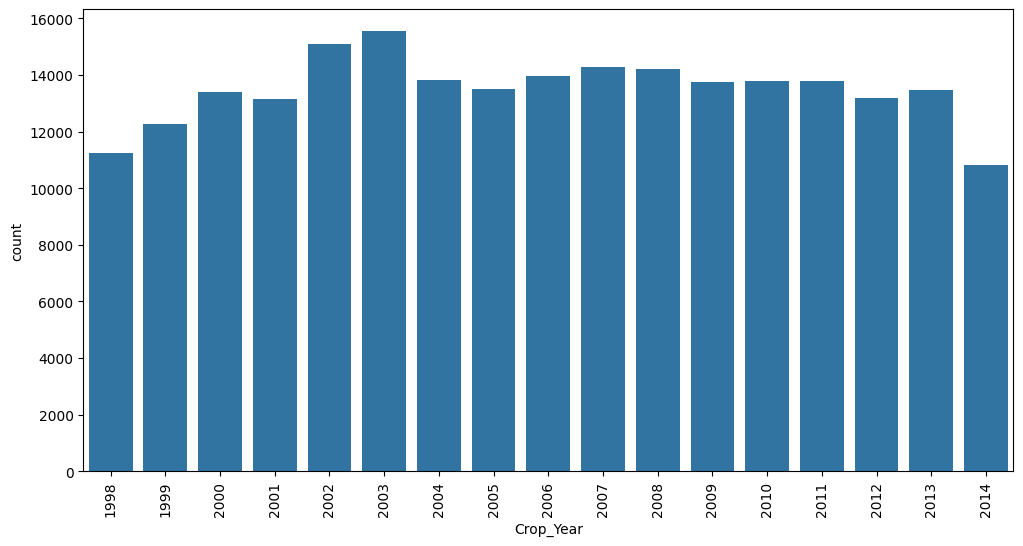

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(x=Crop_df["Crop_Year"],data=Crop_df)
plt.xticks(rotation=90)
plt.show()

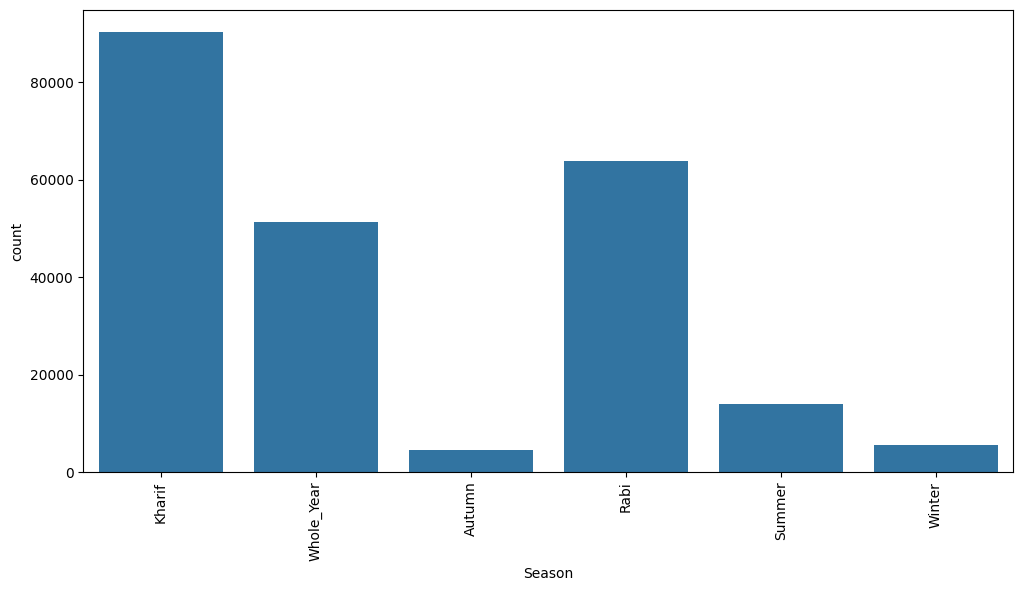

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x=Crop_df["Season"],data=Crop_df)
plt.xticks(rotation=90)
plt.show()

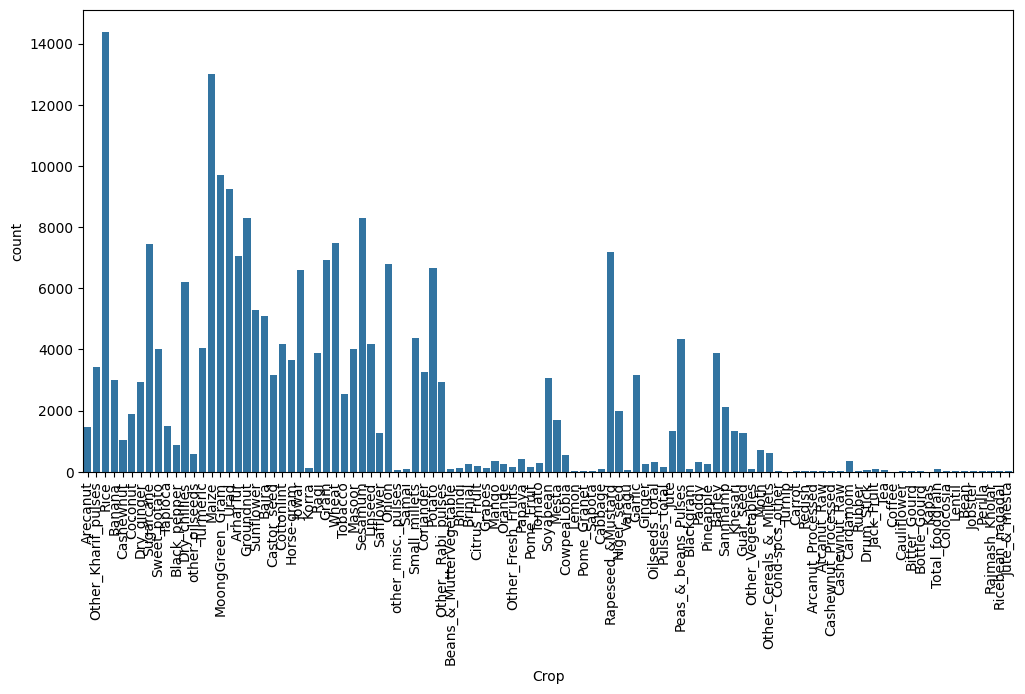

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x=Crop_df["Crop"],data=Crop_df)
plt.xticks(rotation=90)
plt.show()

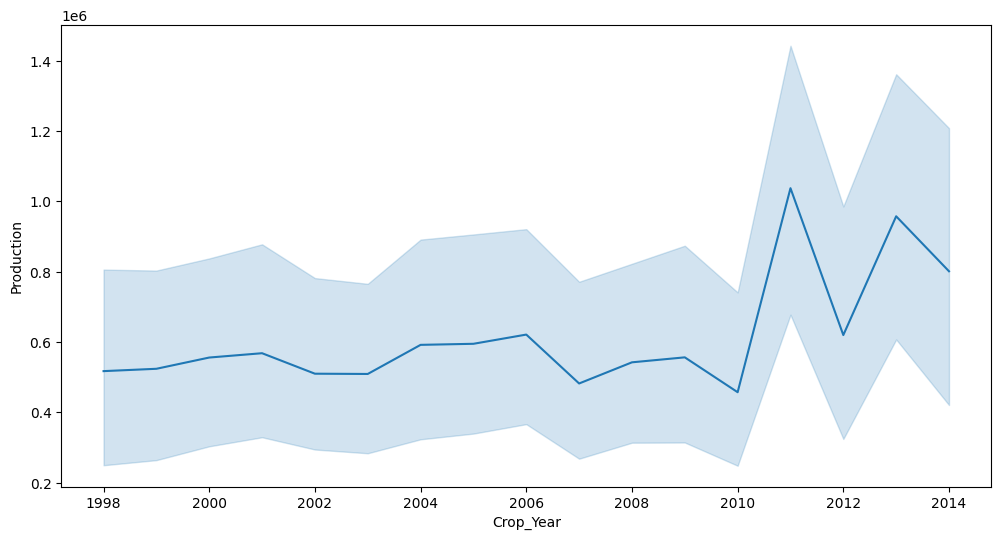

In [19]:

plt.figure(figsize=(12,6))
sns.lineplot(x=Crop_df["Crop_Year"],y=Crop_df["Production"])
plt.show()

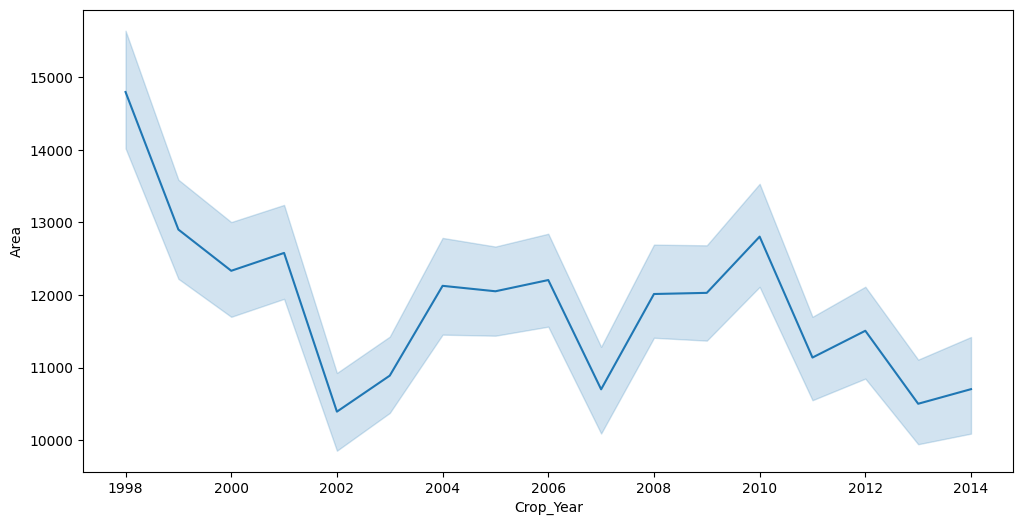

In [20]:

plt.figure(figsize=(12,6))
sns.lineplot(x=Crop_df["Crop_Year"],y=Crop_df["Area"])
plt.show()

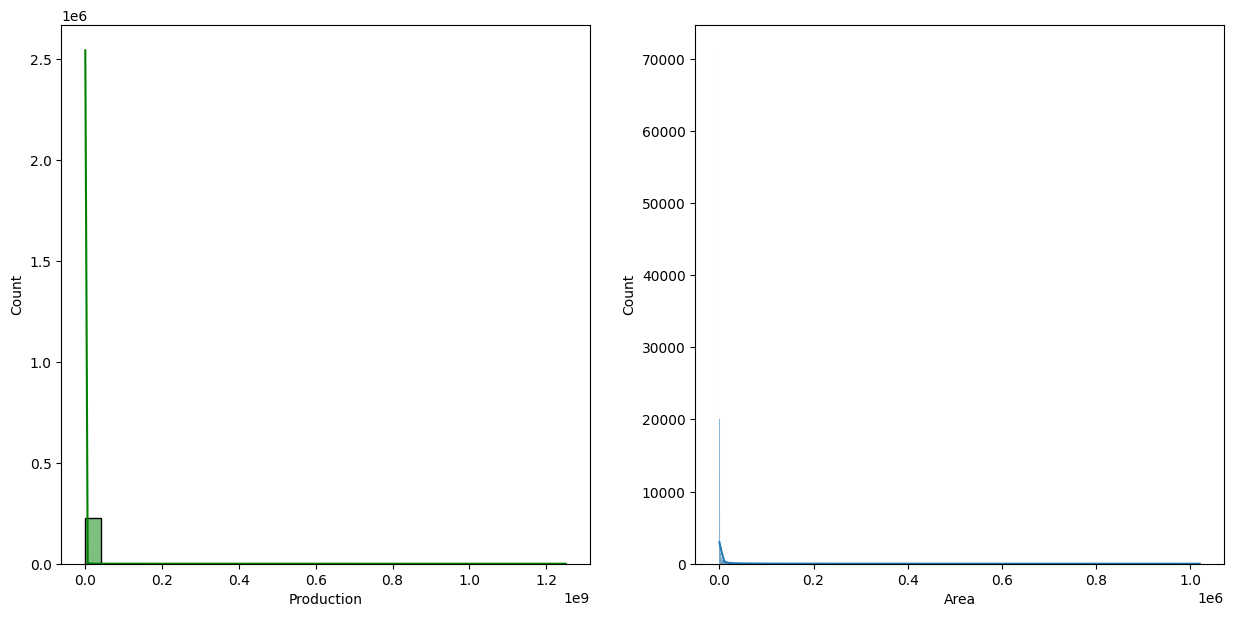

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=Crop_df,x='Production',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=Crop_df,x='Area',kde=True)
plt.show()

# For further and detailed visualization, please refer to the Tableau Dashboard available at this link: [Tableau Dashboard](https://public.tableau.com/app/profile/akash.patil7337/viz/Cropproductioninindia_17140468680850/Report?publish=yes)